## Barotropic model

The initial pressure situation chosen by Richardson to demostrate a bartropic model is a zonal wavenumber one perturbation given by:

$$p_s=10^4 sin^2(\phi)cos(\phi)sin(\lambda)$$

Let's represent this perturbation

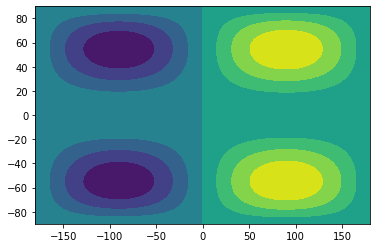

(55.0, 90.0)

In [31]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

ϕ = np.linspace(90,-90,181)
λ = np.linspace(-180,180,361)

λλ, ϕϕ = np.meshgrid(np.radians(λ),np.radians(ϕ))

ps = 10e4*np.square(np.sin(ϕϕ))*np.cos(ϕϕ)*np.sin(λλ)
h = plt.contourf(λ,ϕ,ps)
plt.show()

Location of the centre of the high pressure system (Northern hemisphere)

In [33]:
max_ϕi, max_λi = np.unravel_index(np.argmax(ps, axis=None), ps.shape)

ϕ[max_ϕi], λ[max_λi]

(55.0, 90.0)

In [34]:
# Gravitational acceleration
g = 9.79

# Earth's angular velocity
Ω = 1.458423e-4/2

# Earth's radius
a = 6.366e6

λ0 = 0
ϕ0 = 50.4

Δλ = 5.625
Δϕ = 3.6

Δt = 2700 #3/4 hour

ϕ = np.radians(np.array([ϕ0+Δϕ/2, ϕ0, ϕ0-Δϕ/2]))
cosϕ = np.cos(ϕ)

#λ = np.radians(np.array([λ0-Δλ, λ0, λ0+Δλ]))

cosϕ[0]

0.6129070536529766

In [2]:
Ue = -1064.44
Uw = 1064.44

ΔU = Ue - Uw

ΔU/np.radians(Δλ)

-21684.593615966347

In [3]:
Vn = 78295.45
Vs = 74327.53

(Vn*cosϕ[0]-Vs*cosϕ[2])/np.radians(Δϕ)

-18554.98251712508

In [4]:
divV = (1/(a*cosϕ[1])) * (ΔU/np.radians(Δλ) + (Vn*cosϕ[0]-Vs*cosϕ[2])/np.radians(Δϕ))

divV

-0.009916498688737384

In [35]:
δp = -g*divV

Δp = δp*Δt/100
Δp # hPa

2.6212280983939524